<a href="https://colab.research.google.com/github/lovepreetmultani/python/blob/main/Loan_Detection_Random_Tree_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***To predict whether loan was fully paid or not using random tree algorithm***


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
loan = pd.read_csv('/content/drive/My Drive/Datasets/loan_data.csv',sep=',')

In [6]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.100,11.350407,1.948,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,22.822,11.082143,1.429,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,36.686,10.373491,1.163,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,16.234,11.350407,8.100,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,10.292,11.299732,1.497,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,5.005947,65.292533,10.932117,176.653828,710.846314,4560.767197,1.691396e+04,46.971035,1.577469,0.163708,0.062122,0.160054
std,0.396245,24.300662,120.141564,0.614813,302.190936,37.970537,2496.930377,3.375619e+04,30.933191,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.063900,1.567000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.109500,16.962000,10.558414,1.561250,682.000000,2820.000000,3.187000e+03,22.525000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,30.531000,10.928884,2.275000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.144200,51.916500,11.291293,262.000000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,209.000000,907.600000,14.528354,999.000000,827.000000,17639.958330,1.207359e+06,728.000000,33.000000,13.000000,5.000000,1.000000


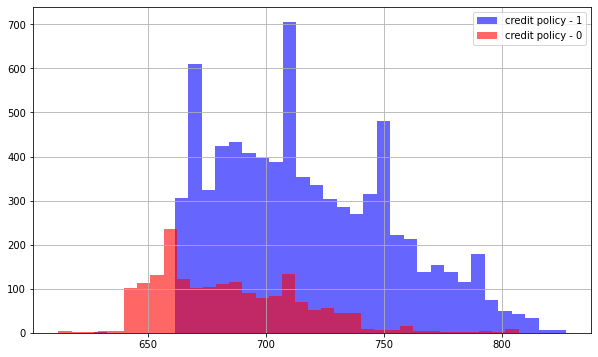

In [9]:
plt.figure(figsize=(10,6))
loan[loan['credit.policy']==1]['fico'].hist(bins=35,color='Blue',label='credit policy - 1', alpha=0.6)
loan[loan['credit.policy']==0]['fico'].hist(bins=35,color='Red',label='credit policy - 0', alpha=0.6)
plt.legend() # For small boxes on top right

In [ ]:
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid']==1]['fico'].hist(bins=35,color='Blue',label='not.fully.paid - 1', alpha=0.6)
loan[loan['not.fully.paid']==0]['fico'].hist(bins=35,color='Red',label='not.fully.paid - 0', alpha=0.6)
plt.legend() # For small boxes on top right

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',data = loan, hue='not.fully.paid', palette='Set1')
plt.show()

In [ ]:
sns.jointplot(x = "fico", y = "int.rate", data = loan)

In [ ]:
sns.lmplot(y='int.rate', x='fico',data=loan, hue='credit.policy', col='not.fully.paid', palette='Set1')

In [ ]:
loan.info()

In [ ]:
cat_feat=loan.reindex(['purpose'],axis=1)

In [ ]:
cat_feat.info()

In [1]:
final_data=pd.get_dummies(loan, columns=cat_feat, drop_first=True)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=loan.drop('not.fully.paid',axis=1)
y=loan['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
pred=dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_test,y_test)

In [ ]:
rfc_pred=rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

In [ ]:
print(confusion_matrix(y_test,rfc_pred))